# **Lending Club Case Study**

*Importing neccessary python libraries for data analysis*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*We want to display all rows and columns whenever we execute a python query*

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

*Mounting lending club csv dataset into google colab notebook*

In [3]:
from google.colab import drive
drive.mount('/content/drive')

#file path in drive
fp = "/content/drive/MyDrive/Colab Notebooks/IIIT Bangalore/2_StatsEssential/3_LendingClub Case Study/loan.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Loading as dataframe using pandas and checking data in notebook*

In [4]:
lcs=pd.read_csv(fp)
lcs.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

*Shape of our dataset : (number of rows, number of columns)*

In [5]:
lcs.shape

(39717, 111)

# Data Understanding

**There are broadly three types of variables-**
1. Those which are related to applicant, demographic variables such as
  * home_ownership
  * emp_title
  * emp_length, etc
2. Loan characteristics
  * loan_amnt
  * int_rate
  * purpose of loan, etc
3. Customer behaviour variables are not available at the time of loan applications such as
  * delinq_2yrs
  * recoveries, etc


# Data Cleaning

1. Check the columns that contains more than 50% of rows with missing values
  * Delete these columns as they dont have sufficient data to perform data analysis
2. Dropping columns that will not effect analysis
  * Columns where all rows contain same value (Single Valued)
  * Columns that denote ID of applicants
3. Dropping columns that are unnecessary based on business understanding
  * Columns that denote customer behaviour variables as they are not available at the time of loan application and thus they cannot be used as predictors for credit approval
4. Dropping Columns assumed to be not necessary for analysis
5. Dropping Rows where loan_status is current
  * Since applicant is in process of paying loan these rows will not help in finding factors that will decide whether to lend money to borrower


*Counting the number of missing values in each column of the dataset.*


In [6]:
lcs.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


*Find columns who have more than 50% of missing data*

In [7]:
fifty = len(lcs) // 2
print(fifty)

# boolean condition
# true if columns have more than 50% of data missing
cond_missingdata = lcs.isnull().sum() >= fifty

# list of columns have more than 50% of data missing
null_cols=[]
for i in range(len(cond_missingdata)):
  if cond_missingdata[i]:
    null_cols.append(lcs.columns[i])

# printing list of columns with missing data
null_cols

19858


['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


*Dropping the columns obtained in above step*

In [8]:
for name in null_cols :
    del lcs[name]

**We can see from total 111 columns 57 null valued columns were dropped**

In [9]:
lcs.shape

(39717, 54)

*Dropping columns that have single value filled in all the rows
as it will not effect analysis*

In [10]:
# list of columns that are single valued
svc=[]
for i in lcs.columns:
  if lcs[i].value_counts().count()<=1:
    print(str(i) + " : " + str(lcs[i].value_counts().count()))
    svc.append(i)
svc
    

pymnt_plan : 1
initial_list_status : 1
collections_12_mths_ex_med : 1
policy_code : 1
application_type : 1
acc_now_delinq : 1
chargeoff_within_12_mths : 1
delinq_amnt : 1
tax_liens : 1


['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [11]:
for name in svc :
    del lcs[name]

**We can see from total 54 columns 9 single valued columns were dropped**

In [12]:
lcs.shape

(39717, 45)

*Dropping columns deemed unnecessary*

1. ID columns
2. Columns that describe Customer Behaviour

In [13]:
lcs = lcs.loc[:,'loan_amnt':'dti']
lcs.shape

(39717, 22)

In [14]:
lcs.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > I'm trying to b...,other,Building my credit history.,774xx,TX,18.08


**Assumption**

*Dropping columns assumed to be unnecessary for analysis based on business understanding*

In [15]:
lcs = lcs.drop(columns=['title','emp_title','url', 'desc','zip_code'])
lcs.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08


*Drop Rows where loan_status is Current*

In [16]:
lcs = lcs[~(lcs['loan_status'] == 'Current')]
lcs.shape

(38577, 17)

**We have finally 38577 rows and 17 columns to be analysed**

# Data Manipulation

1. Convert percentages stored as string to floating point number in column : int_rate
2. Extracting term of loan as integer then converting it into years by dividing it by 12 from column : term
3. Check columns with less percentage of missing values
  * If their data type is object impute missing value with most frequently appearing value
  * If their data type is float or int impute with mean

*Converting object data type to floating point*
1. int_rate

In [17]:
# Check missing value count in int_rate column
lcs['int_rate'].isnull().sum()

0

In [18]:
lcs['int_rate'] = lcs['int_rate'].str.replace("%","").astype(float)
  
lcs.int_rate.head(10)

0     10.65
1     15.27
2     15.96
3     13.49
5      7.90
6     15.96
7     18.64
8     21.28
9     12.69
10    14.65
Name: int_rate, dtype: float64

*Extracting term of loan as integer then converting it into years by dividing it by 12*

In [19]:
lcs['term'] = lcs['term'].str.replace(" months","").astype(int)
lcs['term'] = lcs['term'].apply(lambda x : x//12)
lcs['term'].head(10)

0     3
1     5
2     3
3     3
5     3
6     5
7     3
8     5
9     5
10    5
Name: term, dtype: int64

*Imputing missing object data types with most frequently occuring value*

In [20]:
lcs.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
dtype: int64

In [21]:
cur_mode=lcs['emp_length'].value_counts().index[0]
print('emp_length' +" "+cur_mode)
lcs['emp_length'].fillna(cur_mode,inplace=True)

emp_length 10+ years


**We can see there are no more columns with missing values**

In [22]:
lcs.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
dtype: int64

In [23]:
lcs.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti
0,5000,5000,4975.0,3,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65
1,2500,2500,2500.0,5,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00
2,2400,2400,2400.0,3,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72
3,10000,10000,10000.0,3,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00
5,5000,5000,5000.0,3,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20
6,7000,7000,7000.0,5,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,NC,23.51
7,3000,3000,3000.0,3,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,CA,5.35
8,5600,5600,5600.0,5,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,CA,5.55
9,5375,5375,5350.0,5,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,TX,18.08
10,6500,6500,6500.0,5,14.65,153.45,C,C3,5 years,OWN,72000.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,AZ,16.12


# Outlier Detection
1. Plotting boxplots
2. Removing outliers using .quantile
3. Using .shape function on pandas dataframe to check rows having outliers were dropped
 

*importing necessary libraries*

In [24]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

***Function to remove outliers using Inter Quantile Range***

In [25]:
def rem_outliers(col_out):
  Q1 = col_out.quantile(0.25)
  Q3 = col_out.quantile(0.75)
  Inter_Quartile_Range = Q3-Q1
  return lcs[~((col_out < (Q1 - 1.5*Inter_Quartile_Range)) | (col_out>(Q3 +1.5*Inter_Quartile_Range)))]


In [26]:
lcs.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti'],
      dtype='object')

In [27]:
lcs.shape

(38577, 17)

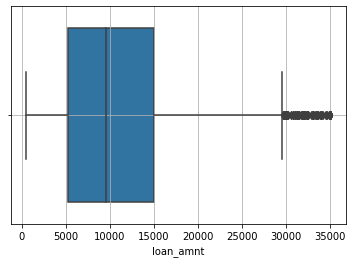

In [28]:
sns.boxplot(lcs['loan_amnt'])
plt.grid()

In [29]:
lcs = rem_outliers(lcs['loan_amnt'])
lcs.shape

(37489, 17)

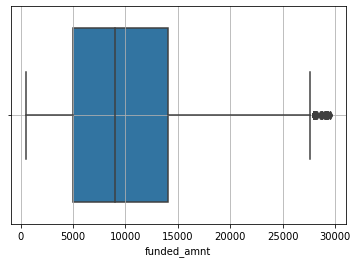

In [30]:
sns.boxplot(lcs['funded_amnt'])
plt.grid()

In [31]:
lcs = rem_outliers(lcs['funded_amnt'])
lcs.shape

(37327, 17)

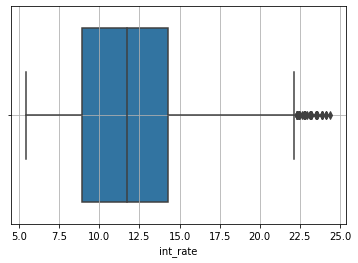

In [32]:
sns.boxplot(lcs['int_rate'])
plt.grid()

In [33]:
lcs = rem_outliers(lcs['int_rate'])
lcs.shape

(37263, 17)

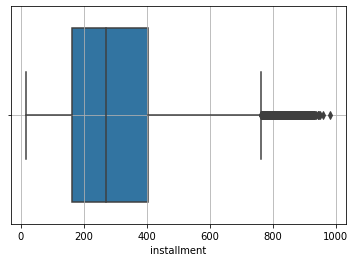

In [34]:
sns.boxplot(lcs['installment'])
plt.grid()

In [35]:
lcs = rem_outliers(lcs['installment'])
lcs.shape

(36213, 17)

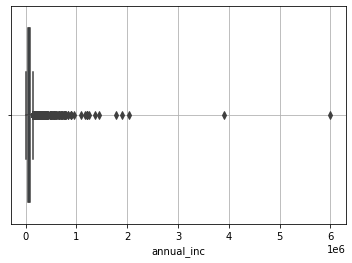

In [36]:
sns.boxplot(lcs['annual_inc'])
plt.grid()

In [37]:
lcs = rem_outliers(lcs['annual_inc'])
print(lcs.shape)

(34640, 17)


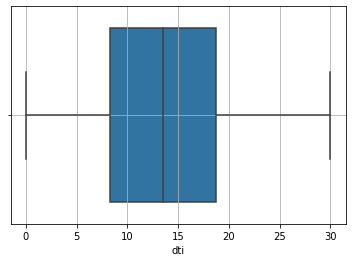

In [38]:
sns.boxplot(lcs['dti'])
plt.grid()

In [39]:
lcs.shape

(34640, 17)

**We have 34640 rows and 17 columns to be analysed**

# Derived Metrics
1. Type Driven
  * Extracting month as int from issue_d column and storing in issue_month column to find how months affect the loan status irrespective of year
2. Business Driven
  * Making new column **cia** which stores total amount to be paid by borrower after the given **term** using compound interest formula
  * *amount_payable = principal amount(1 + interest rate) ^ time in years*
  * We want to analyse how amount to be paid at end of term effects loan status

*Extracting month as int from issue_d columns to find how months effect the loan status irrespective of year*

In [40]:
lcs['issue_month'] = (pd.DatetimeIndex(pd.to_datetime(lcs['issue_d'],format='%b-%y')).month).astype(int)

In [41]:
lcs['issue_month'].value_counts()

12    3747
11    3598
10    3304
9     3106
7     3049
8     3040
6     2872
5     2652
4     2557
3     2408
1     2171
2     2136
Name: issue_month, dtype: int64

*Creating new column cia : compound interest amount*

In [42]:
lcs['cia'] = lcs.apply( lambda row : row.loan_amnt *((1 + row.int_rate )**row.term) , axis=1)
lcs['cia'].head(10)

0     7.905836e+06
1     2.850216e+09
2     1.170816e+07
3     3.042322e+07
5     3.524845e+06
6     9.822619e+09
7     2.272719e+07
8     3.074425e+10
9     2.584614e+09
10    6.102181e+09
Name: cia, dtype: float64

In [43]:
lcs.shape

(34640, 19)

# Univariate Analysis
1. Making distplot from seaborn library for all numerical variables 

In [44]:
lcs.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,issue_month,cia
count,34640.000000,34640.000000,34640.000000,34640.000000,34640.000000,34640.00000,34640.000000,34640.000000,34640.000000,3.464000e+04
mean,9734.006207,9513.243360,9028.810933,3.469226,11.731140,284.36822,58902.955954,13.415771,7.089665,4.601035e+09
std,5803.459870,5563.838753,5545.401359,0.847526,3.582113,161.11313,26479.050686,6.672438,3.409813,1.457849e+10
min,500.000000,500.000000,0.000000,3.000000,5.420000,15.69000,4000.000000,0.000000,1.000000,2.646093e+05
25%,5000.000000,5000.000000,4872.868311,3.000000,8.900000,158.86000,39600.000000,8.297500,4.000000,6.334956e+06
50%,8500.000000,8450.000000,8000.000000,3.000000,11.580000,258.10000,54996.000000,13.520000,7.000000,1.792076e+07
75%,13500.000000,13000.000000,12000.000000,3.000000,14.220000,383.65000,75000.000000,18.700000,10.000000,7.729374e+07
max,29500.000000,27600.000000,27600.000000,5.000000,22.110000,762.08000,137500.000000,29.990000,12.000000,1.794832e+11


***Function to make distplot***

In [45]:
def construct_distplot(df_col) :
  plt.figure(figsize=(9,9))
  sns.distplot(df_col)
  plt.grid()
  plt.show()  


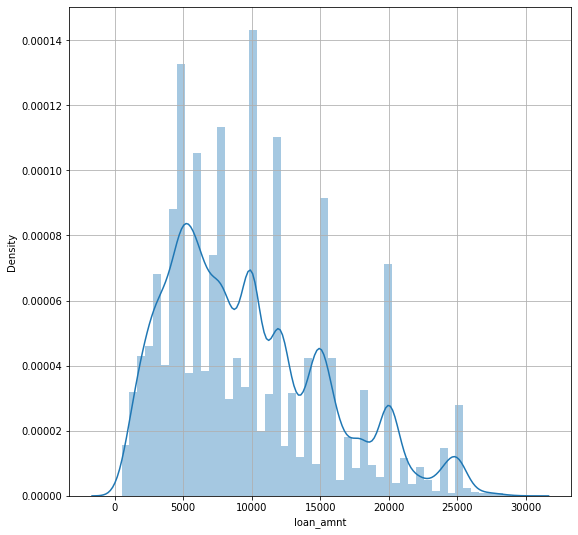

In [46]:
construct_distplot(lcs['loan_amnt'])

Most loan applicants have principal amount between 5000 USD to 10000 USD

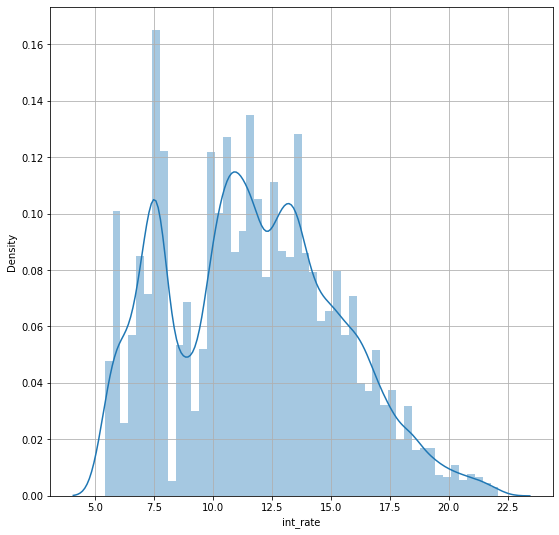

In [47]:
construct_distplot(lcs['int_rate'])

7.5 % interest rate is most preferred by loan applicants

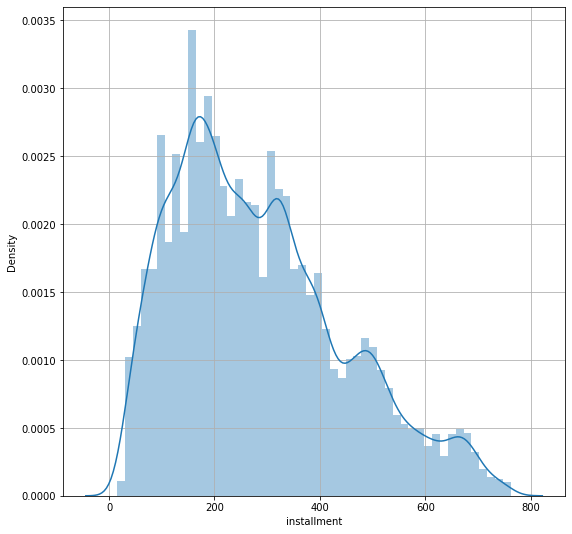

In [48]:
construct_distplot(lcs['installment'])

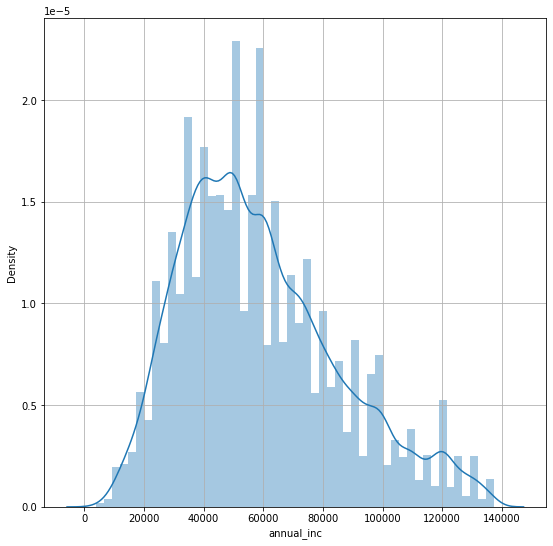

In [49]:
construct_distplot(lcs['annual_inc'])

We can see most loan applicants have annual income between 40000 USD to 60000 USD 

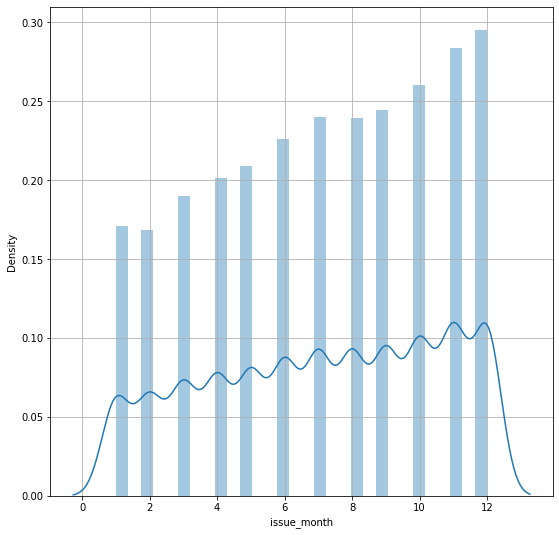

In [50]:
construct_distplot(lcs['issue_month'])

Majority of Loan applicants like to take loan or are issued loan in month of December

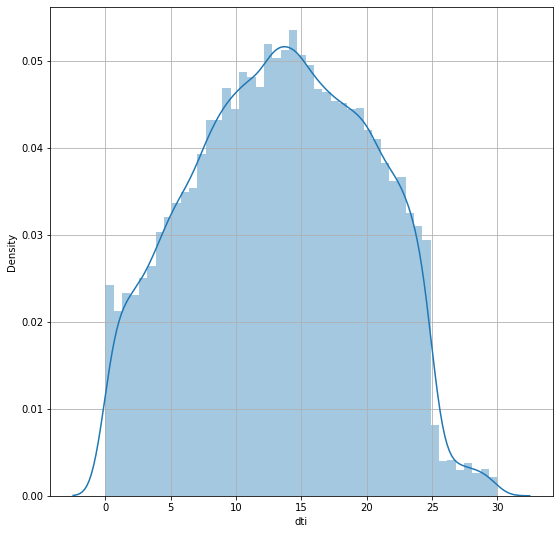

In [51]:
construct_distplot(lcs['dti'])

# Segmented Univariate analysis

1. Convert the categorical column loan status to numerical
  * We know column loan_status is our target column


In [52]:
loanStatus={}
cat_num = lcs['loan_status'].astype('category').cat.categories.tolist()
loanStatus = {'loan_status': {p: q for p,q in zip(cat_num,list(range(0,len(cat_num))))}}
print(loanStatus)
lcs.replace(loanStatus,inplace=True)

lcs.loan_status.value_counts()


{'loan_status': {'Charged Off': 0, 'Fully Paid': 1}}


1    29624
0     5016
Name: loan_status, dtype: int64

**Lets divide dataset based on whether applicant charged off or fully paid**

*Charged off Denoted by 0*

In [53]:
lcs_chargedOff = lcs[(lcs.loan_status == 0)]
# lcs_chargedOff.info()
lcs_chargedOff.shape

(5016, 19)

*Fully Paid denoted by 1*

In [54]:
lcs_fullyPaid = lcs[(lcs.loan_status == 1)]
# lcs_fullyPaid.head(10)
lcs_fullyPaid.shape

(29624, 19)

In [55]:
lcs.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'issue_month', 'cia'],
      dtype='object')

***Function to make countplots using seaborn library of columns***

In [56]:
def make_cp(cn):
  plt.figure(figsize=(8,8))
  sns.countplot(cn,order = cn.value_counts().index)
  plt.xticks(rotation=90)
  plt.grid()
  plt.show()

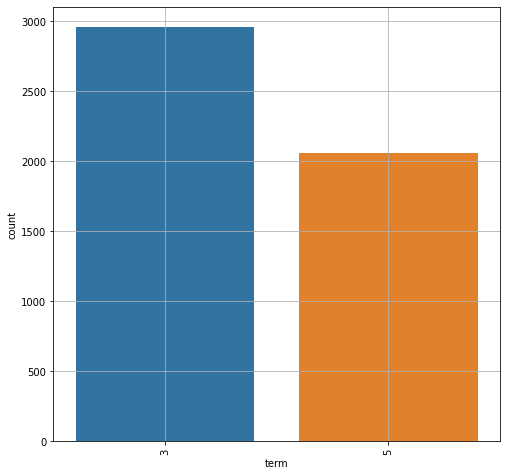

In [57]:
make_cp(lcs_chargedOff['term'])

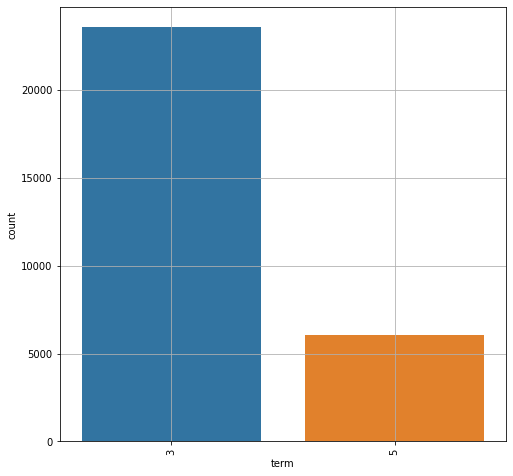

In [58]:
make_cp(lcs_fullyPaid['term'])

Loan status doesnot depend on term of loan 

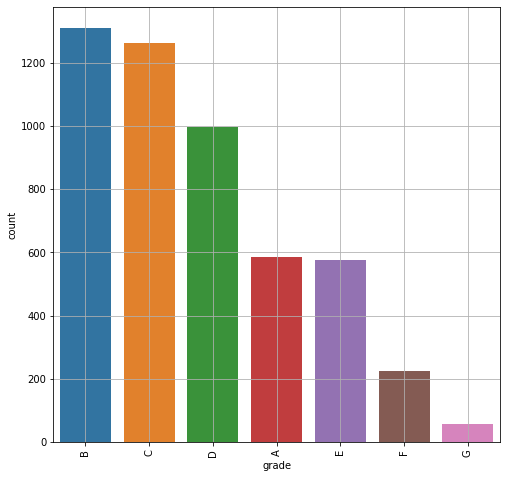

In [59]:
make_cp(lcs_chargedOff['grade'])

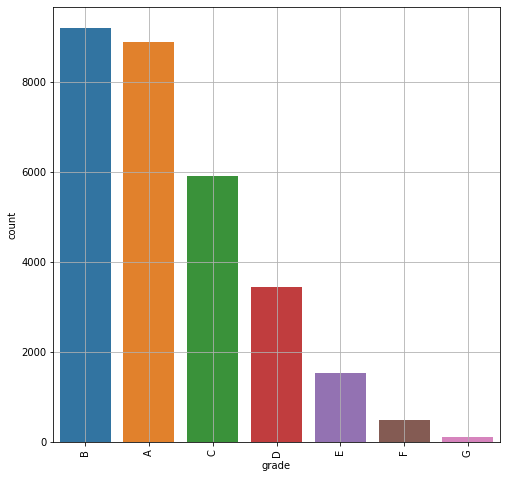

In [60]:
make_cp(lcs_fullyPaid['grade'])

**Deciding Feature 1 : grade**

* Loan applicants of grade C and grade D are mostly defaulters


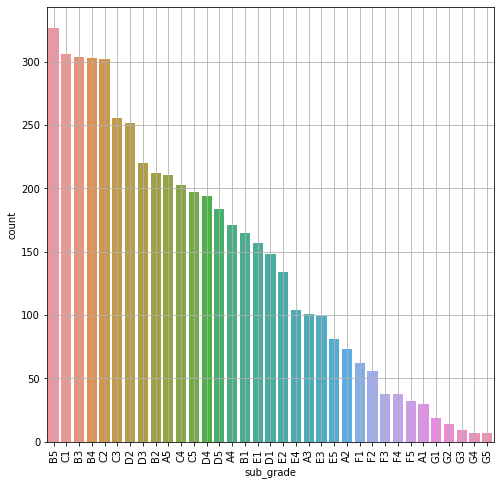

In [61]:
make_cp(lcs_chargedOff['sub_grade'])

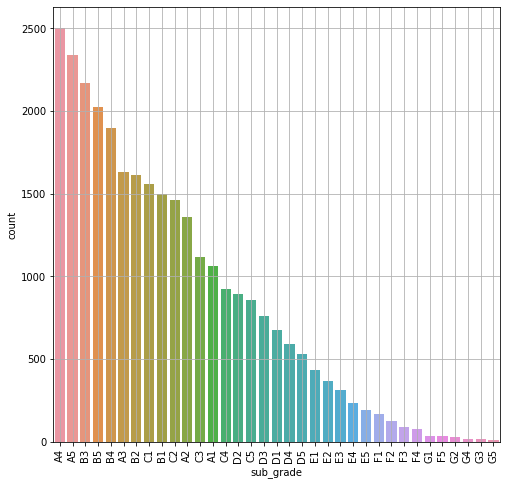

In [62]:
make_cp(lcs_fullyPaid['sub_grade'])

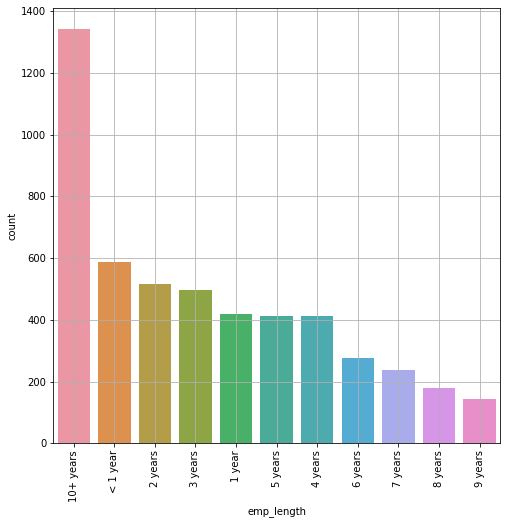

In [63]:
make_cp(lcs_chargedOff['emp_length'])

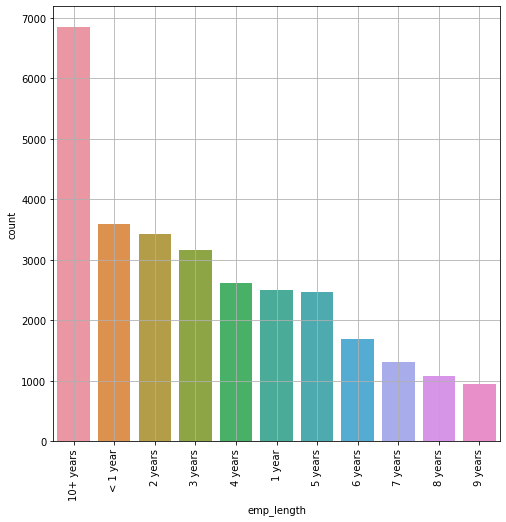

In [64]:
make_cp(lcs_fullyPaid['emp_length'])

Employee length doesnot effect loan status

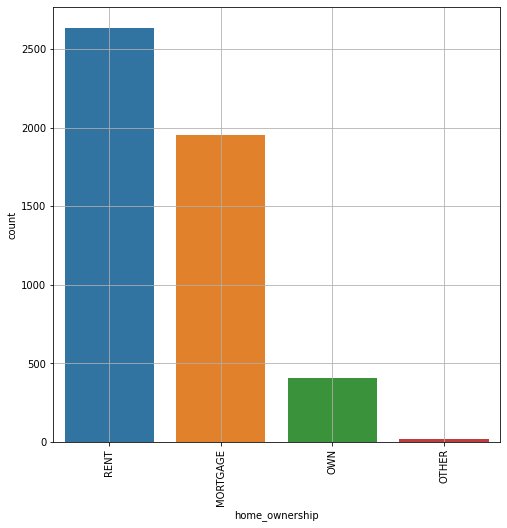

In [65]:
make_cp(lcs_chargedOff['home_ownership'])

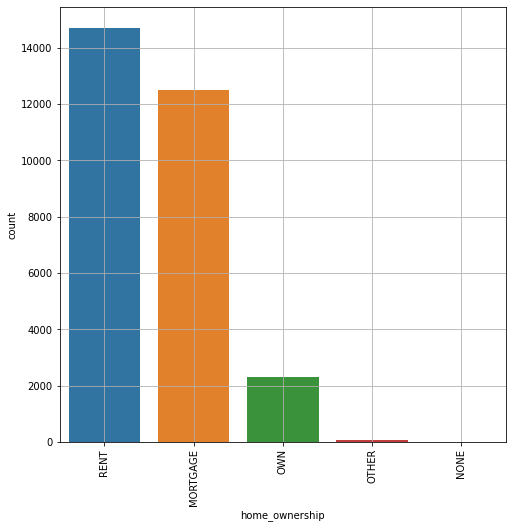

In [66]:
make_cp(lcs_fullyPaid['home_ownership'])

Home ownership doesnot make any impact on loan status

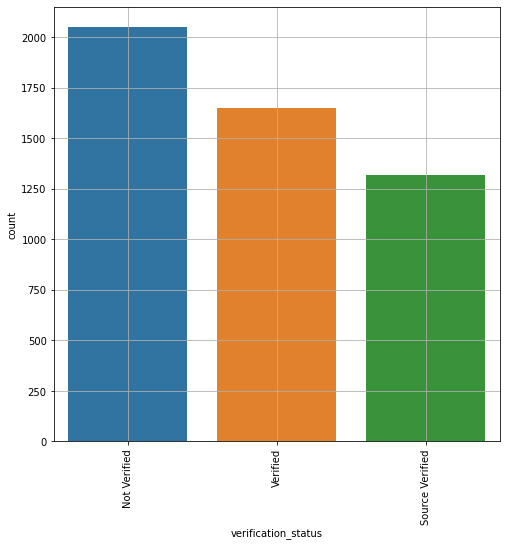

In [67]:
make_cp(lcs_chargedOff['verification_status'])

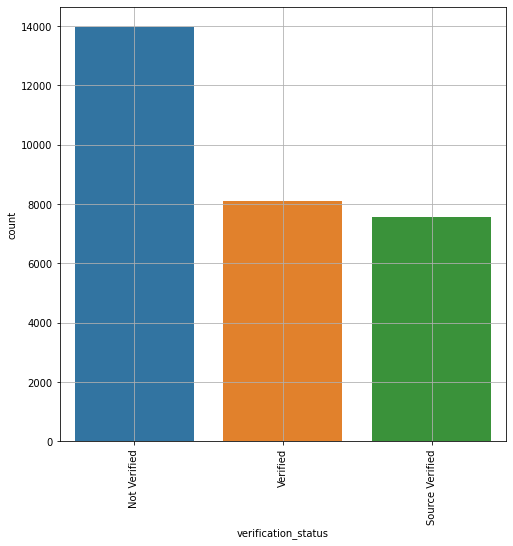

In [68]:
make_cp(lcs_fullyPaid['verification_status'])

Verification status doesnot determine status of loan applicant

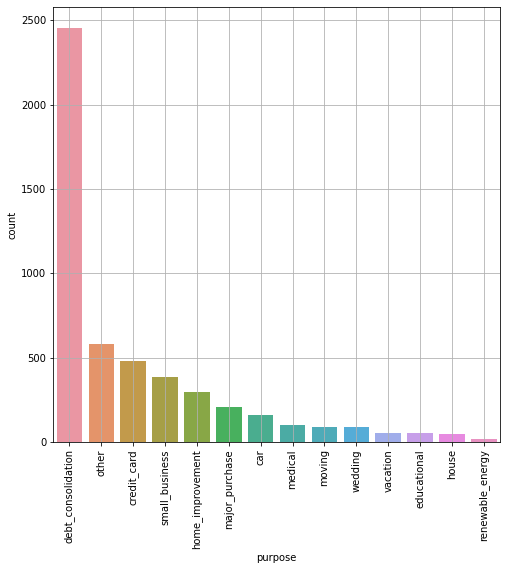

In [69]:
make_cp(lcs_chargedOff['purpose'])

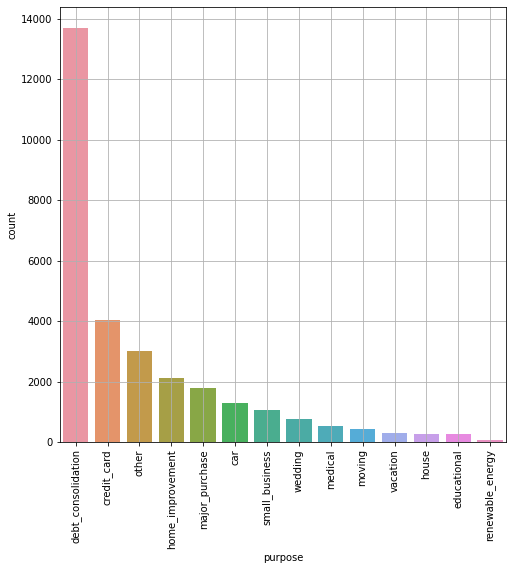

In [70]:
make_cp(lcs_fullyPaid['purpose'])

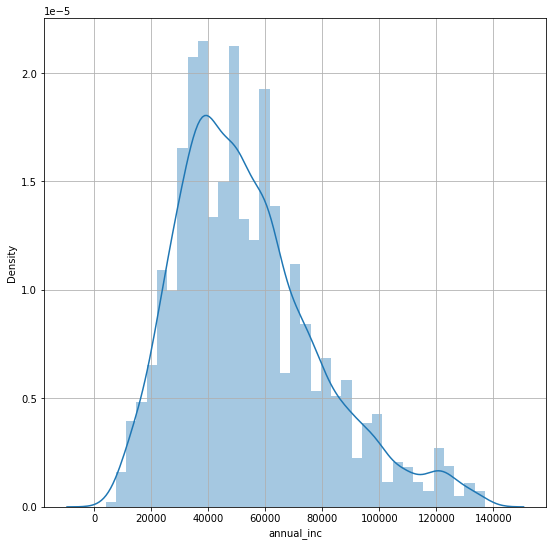

In [71]:
construct_distplot(lcs_chargedOff['annual_inc'])

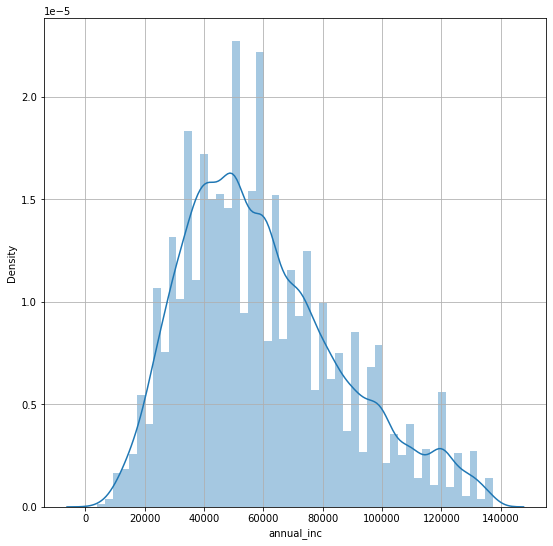

In [72]:
construct_distplot(lcs_fullyPaid['annual_inc'])

**Deciding Feature 2: annual_inc**

*small_business are more prone to charge off as loan applicant*

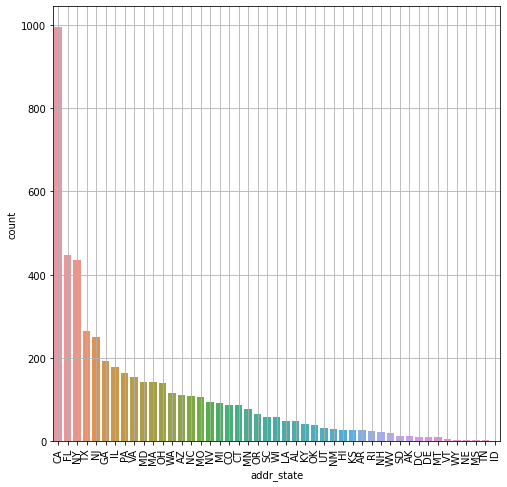

In [73]:
make_cp(lcs_chargedOff['addr_state'])

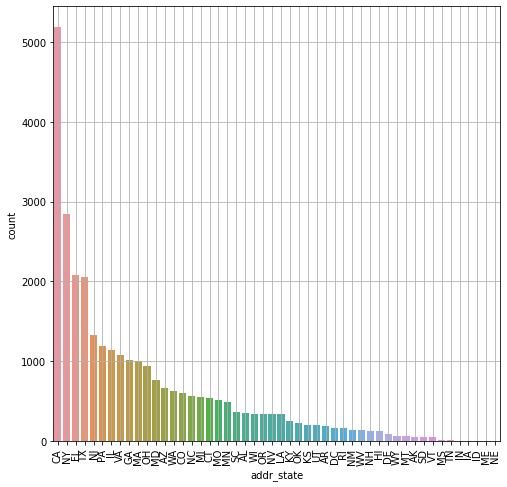

In [74]:
make_cp(lcs_fullyPaid['addr_state'])

**Deciding Feature 3 : address state**

*People from state of California and Florida are more likely to charge of*

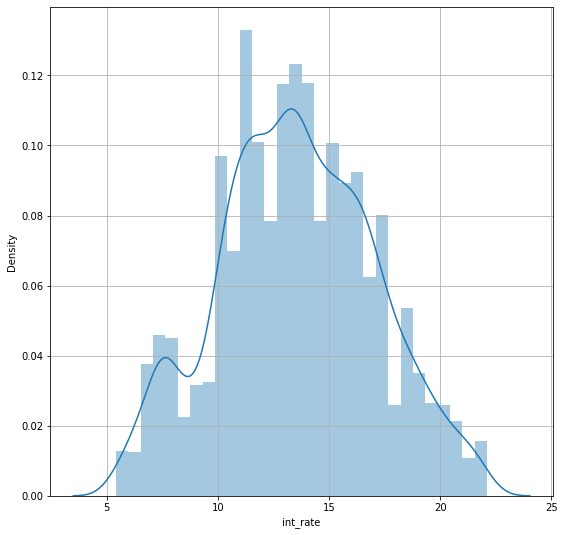

In [75]:
construct_distplot(lcs_chargedOff['int_rate'])

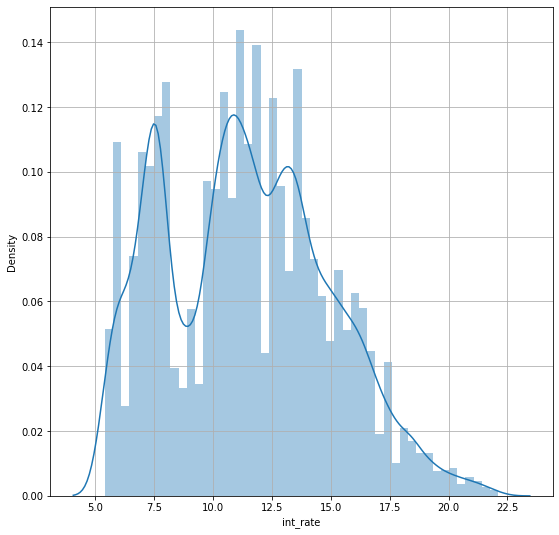

In [76]:
construct_distplot(lcs_fullyPaid['int_rate'])

**Deciding Feature 4 : int_rate**

*Loan applications that have interest rate between 10% to 15% will most likely charge off*

# Bivariate Analysis

1. Encode categorical data to numerical for ease of analysis and correlation
2. Find correlation of all columns with respect to target column loan_status
3. Bivariate analysis on continuous variables (*TO DO*)
4. Bivariate analysis on categorical variables (*TO DO*)

*Converting Categorical Data to numerical data*

In [77]:
cat_to_num_dict={}
for cn in lcs.columns:
  if lcs[cn].dtypes == object and lcs[cn].value_counts().count()<=50:
    print(str(cn) + " : " + str(lcs[cn].value_counts().count()))
    encode = lcs[cn].astype('category').cat.categories.tolist()
    cat_to_num_dict = {cn : {p: q for p,q in zip(encode,list(range(0,len(encode))))}}
    print(cat_to_num_dict)
    lcs.replace(cat_to_num_dict,inplace=True)
  

grade : 7
{'grade': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}}
sub_grade : 35
{'sub_grade': {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}}
emp_length : 11
{'emp_length': {'1 year': 0, '10+ years': 1, '2 years': 2, '3 years': 3, '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9, '< 1 year': 10}}
home_ownership : 5
{'home_ownership': {'MORTGAGE': 0, 'NONE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4}}
verification_status : 3
{'verification_status': {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}}
purpose : 14
{'purpose': {'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'me

In [78]:
lcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34640 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            34640 non-null  int64  
 1   funded_amnt          34640 non-null  int64  
 2   funded_amnt_inv      34640 non-null  float64
 3   term                 34640 non-null  int64  
 4   int_rate             34640 non-null  float64
 5   installment          34640 non-null  float64
 6   grade                34640 non-null  int64  
 7   sub_grade            34640 non-null  int64  
 8   emp_length           34640 non-null  int64  
 9   home_ownership       34640 non-null  int64  
 10  annual_inc           34640 non-null  float64
 11  verification_status  34640 non-null  int64  
 12  issue_d              34640 non-null  object 
 13  loan_status          34640 non-null  int64  
 14  purpose              34640 non-null  int64  
 15  addr_state           34640 non-null 

*Correlation Matrix for bivariate analysis*

In [79]:
cr=lcs.corr()
cr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,issue_month,cia
loan_amnt,1.000000,0.977842,0.926524,0.359606,0.237869,0.919647,0.228994,0.242373,-0.034025,-0.137374,0.340084,0.357289,-0.054397,-0.161695,0.004662,0.095448,0.043055,0.432116
funded_amnt,0.977842,1.000000,0.949442,0.341717,0.247934,0.949901,0.234941,0.246462,-0.033720,-0.131640,0.335263,0.350261,-0.052430,-0.165327,0.005013,0.094901,0.030118,0.423645
funded_amnt_inv,0.926524,0.949442,1.000000,0.365261,0.241980,0.886154,0.211556,0.222487,-0.036139,-0.132074,0.319994,0.366567,-0.036549,-0.165991,0.005299,0.102139,0.057634,0.430995
term,0.359606,0.341717,0.365261,1.000000,0.422820,0.078581,0.416464,0.428393,-0.025910,-0.094065,0.065652,0.237953,-0.171168,-0.039520,0.007515,0.076786,0.024441,0.567810
int_rate,0.237869,0.247934,0.241980,0.422820,1.000000,0.218885,0.945395,0.959330,0.005052,0.097572,0.010895,0.174074,-0.207409,-0.008780,-0.004291,0.104746,0.021819,0.527082
installment,0.919647,0.949901,0.886154,0.078581,0.218885,1.000000,0.206668,0.215899,-0.025499,-0.095694,0.333408,0.295776,-0.019017,-0.166386,0.001047,0.082911,0.018560,0.287479
grade,0.228994,0.234941,0.211556,0.416464,0.945395,0.206668,1.000000,0.977661,0.005392,0.083017,0.019304,0.161487,-0.195939,-0.001695,-0.006384,0.088967,-0.031798,0.545738
sub_grade,0.242373,0.246462,0.222487,0.428393,0.959330,0.215899,0.977661,1.000000,0.006709,0.085967,0.021549,0.169379,-0.200317,-0.002816,-0.004790,0.094954,-0.035890,0.557117
emp_length,-0.034025,-0.033720,-0.036139,-0.025910,0.005052,-0.025499,0.005392,0.006709,1.000000,0.068763,-0.044554,-0.023621,0.012604,0.003676,-0.005988,-0.016974,-0.002396,-0.018810
home_ownership,-0.137374,-0.131640,-0.132074,-0.094065,0.097572,-0.095694,0.083017,0.085967,0.068763,1.000000,-0.315054,-0.052856,-0.022912,0.031663,-0.040818,0.015028,-0.003168,-0.049890


*Since our target column is loan_status finding correlation of all variables with respect to it*

In [80]:
cr.loan_status.sort_values().reset_index()

,index,loan_status
0,int_rate,-0.207409
1,sub_grade,-0.200317
2,grade,-0.195939
3,term,-0.171168
4,cia,-0.156430
5,loan_amnt,-0.054397
6,funded_amnt,-0.052430
7,verification_status,-0.049234
8,dti,-0.042530
9,purpose,-0.038848


In [81]:
col_num = ['loan_amnt','int_rate','installment','annual_inc','dti','loan_status','cia']

In [82]:
# Compute the correlation matrix
lcor = lcs[col_num].corr()
lcor

,loan_amnt,int_rate,installment,annual_inc,dti,loan_status,cia
loan_amnt,1.000000,0.237869,0.919647,0.340084,0.095448,-0.054397,0.432116
int_rate,0.237869,1.000000,0.218885,0.010895,0.104746,-0.207409,0.527082
installment,0.919647,0.218885,1.000000,0.333408,0.082911,-0.019017,0.287479
annual_inc,0.340084,0.010895,0.333408,1.000000,-0.077853,0.078828,0.112194
dti,0.095448,0.104746,0.082911,-0.077853,1.000000,-0.042530,0.079557
loan_status,-0.054397,-0.207409,-0.019017,0.078828,-0.042530,1.000000,-0.156430
cia,0.432116,0.527082,0.287479,0.112194,0.079557,-0.156430,1.000000


Text(0.5, 1.0, 'Correlation between numerical features')

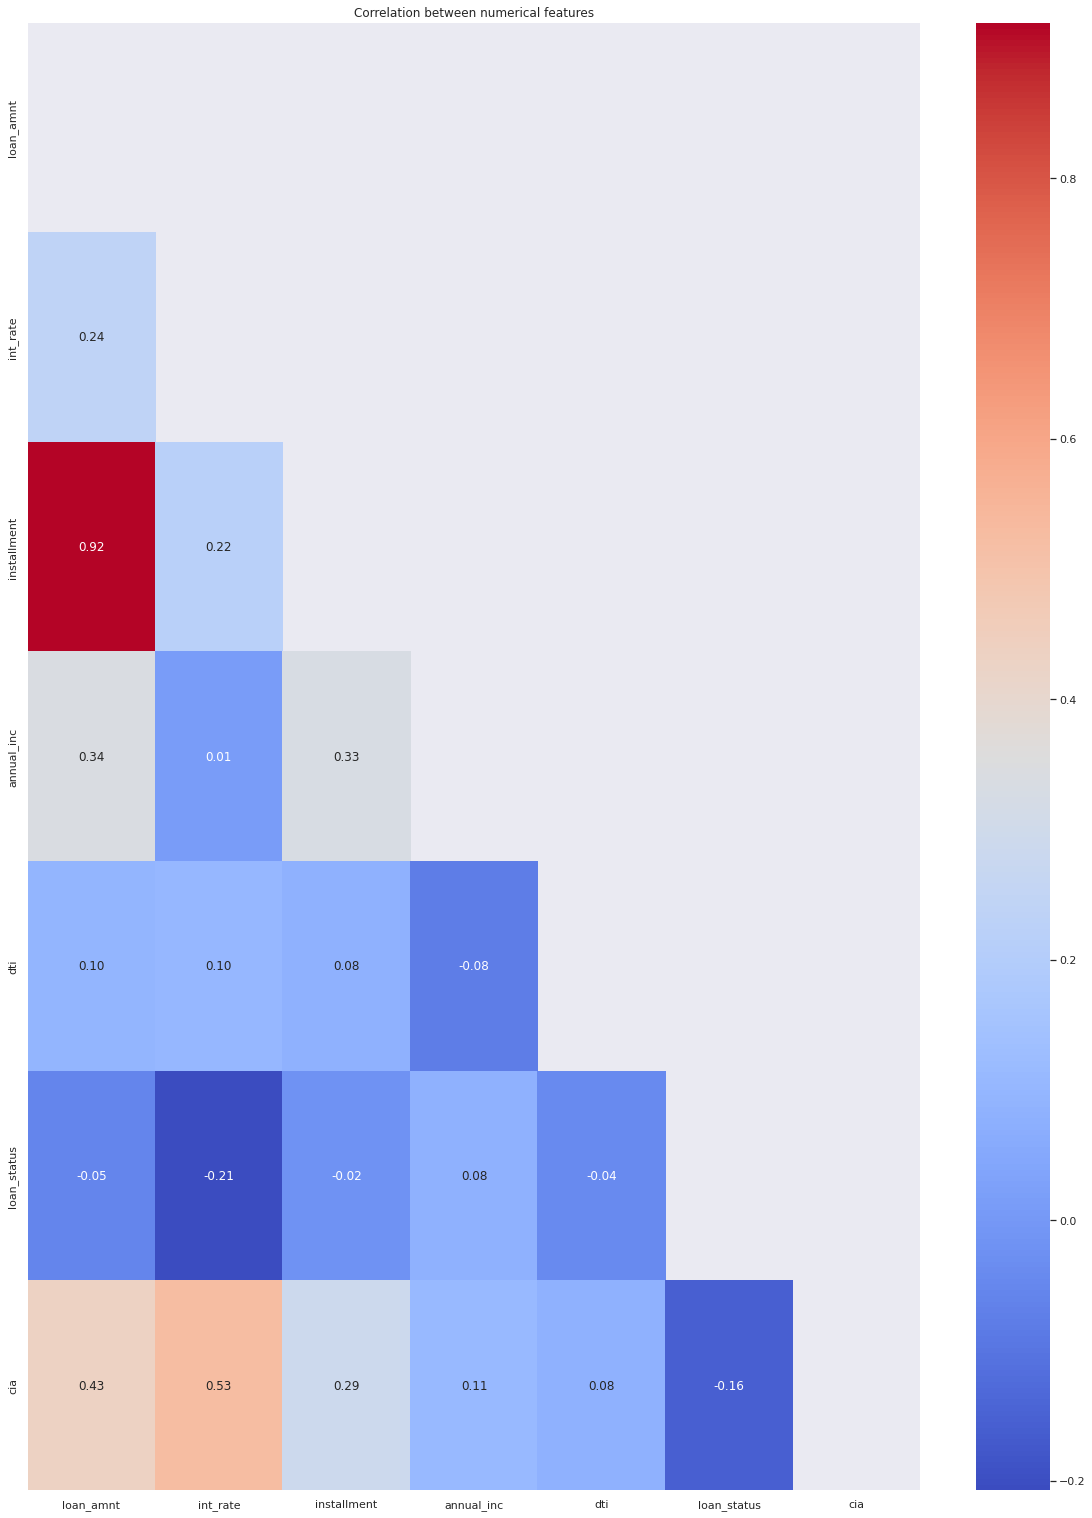

In [83]:
sns.set(rc={'figure.figsize':(20,27)})

# Generate a mask for the upper triangle
mk = np.zeros_like(lcor, dtype=np.bool)
mk[np.triu_indices_from(mk)] = True

sns.heatmap(lcor, mask=mk, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

**Deciding Feature 5 : cia **

* *cia denotes amount to be paid if compound interest is done on loan*
* *we can see cia is negatively correlated with loan status means higher the amount to be paid at end of term greater the chances to charge off*

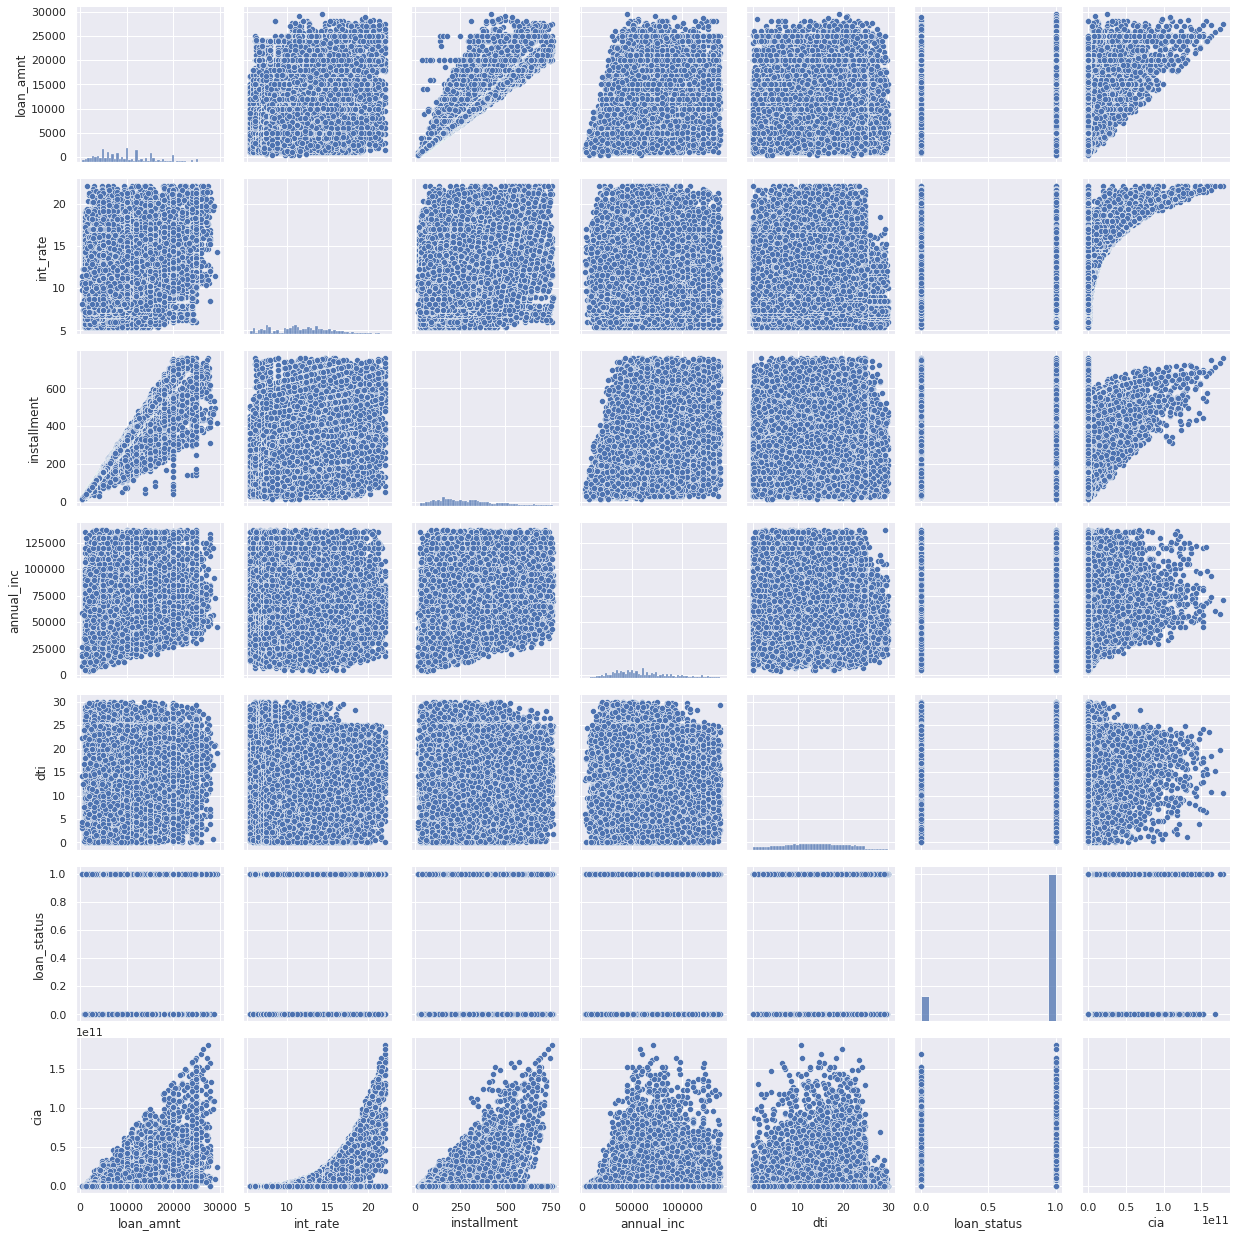

In [84]:
sns.pairplot(lcs[col_num])

# Rough Work

In [85]:
print(np.__version__)

1.21.5


In [86]:
print(pd.__version__)

1.3.5


In [87]:
print(sns.__version__)

0.11.2
